### 1.- Post-angiogenesis tumor growth for distinct blood vessel networks (network analysis)

In this test we obtain the max. entropy of the tumor observed after letting it grow with different blood vessel networks. 

High entropy values correspond to cases where the tumor grew more, i.e. "stronger" networks.

In [1]:
#Tumor model imports 
from TumorAngiogenesisSynchro import Tissue
from TumorAngiogenesisSynchro import Therapy
from TumorAngiogenesisSynchro import TherapyType
from TumorAngiogenesisSynchro import CellType

from BloodVesselGraph import BloodVesselGraph
from BloodVesselGraph import AutomatonToGraph

#Other utilities 
from ImageEntropyCalculator import ImageEntropyCalculator
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import tikzplotlib
import csv
from matplotlib import rc

#Notifications
#import pywhatkit as kit
#import time
#import keyboard as k
#import pyautogui

### No therapy

First we examine how network metrics relate to the maximum tumor entropy when no therapy is applied. 

More entropy is related with a higher dissemination of the tumor. 

In [2]:
srcPath = "bloodvessel_objects/"
nNetworks = 100
automatonWidth = 150 
automatonHeight = 150

tumorEvolutionSteps = 100
entropyCalculator = ImageEntropyCalculator()
maxEntropyValues = []
maxEntropyValue = 0

#We obtain the maximum entropy post-angiogenesis for all 100 networks
for i in range(0, nNetworks):
    
    print("Analyzing network: "+str(i + 1))
    print("Max. entropy value: "+str(maxEntropyValue))
    completePath = srcPath + "tumor_" +str(i)+".pkl"
    
    #Open the evolved tumor template
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(completePath)
    
    #Continue the tumor evolution
    tumor.continueTumorEvolution(tumorEvolutionSteps, True, True, True, False)
    
    #Obtain the max entropy of tumor after angiogenesis
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(401, 400 + tumorEvolutionSteps)]
    maxEntropyValue = np.max(entropyTimeSeries)
    maxEntropyValues.append(maxEntropyValue)
    
    clear_output(wait = True)

Analyzing network: 100
Max. entropy value: 0.8821188217553654


100%|█████████████████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]


In [4]:
#Open the metric averages for networks.
def readCSVColumn(path, colNum):
    colData = []
    
    with open(path, 'r') as file:
        csvreader = csv.reader(file)
        i = 0
        for row in csvreader:
            if(i > 0):
                colData.append(float(row[colNum]))
            i = i + 1
    
    return colData

In [3]:
averageMetricsPath = "network_metrics/metrics.csv"
averageDegrees = readCSVColumn(averageMetricsPath, 1)
averageBetweenness = readCSVColumn(averageMetricsPath, 2)
averagePageRanks = readCSVColumn(averageMetricsPath, 3)
averageClusteringCoefficients = readCSVColumn(averageMetricsPath,4)

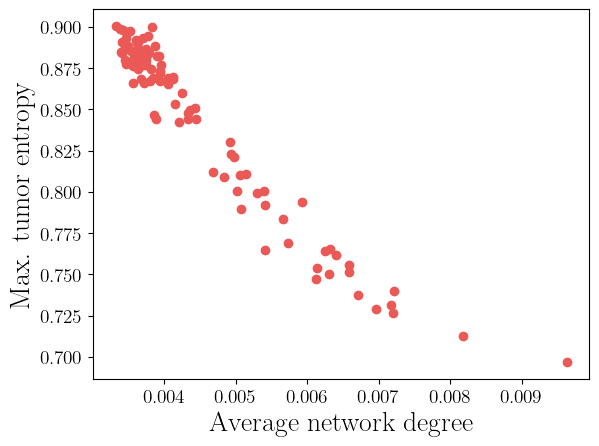

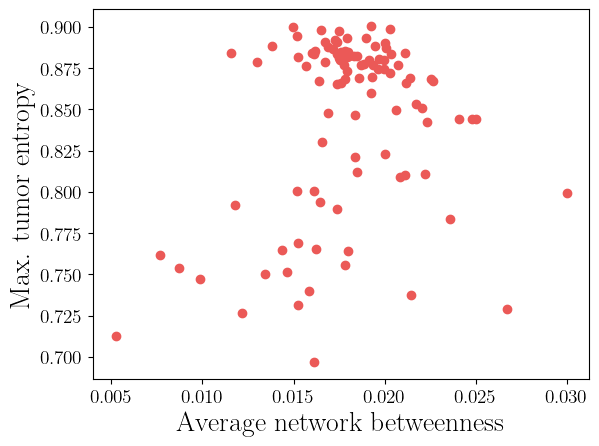

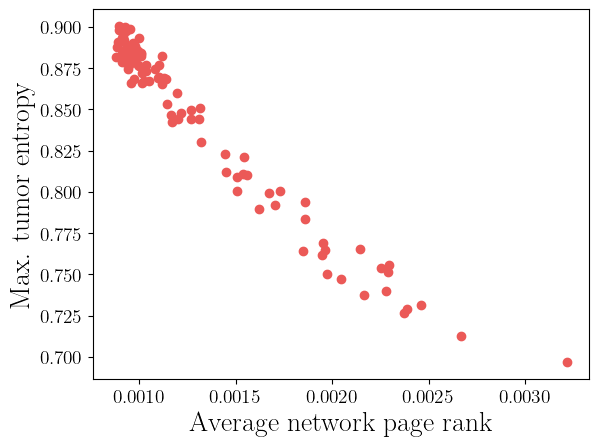

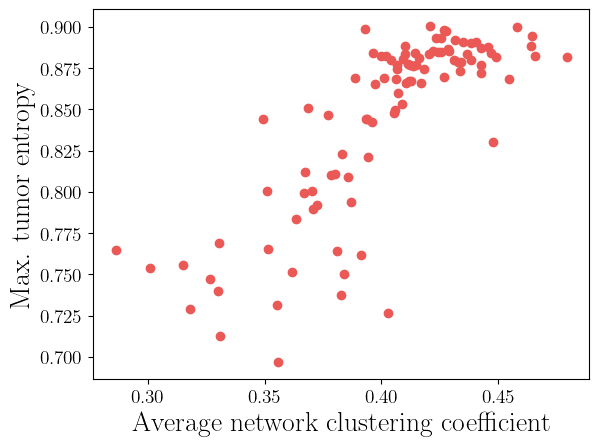

In [5]:
#exportTikzPath = "tikz_graphs"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('axes', labelsize=20) 
rc('xtick', labelsize=14)
rc('ytick',labelsize = 14)


#Average degree - Max entropy plot
plt.figure()
plt.plot(averageDegrees, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network degree")
plt.ylabel("Max. tumor entropy")
plt.savefig('Figures/average_degrees_non_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_degrees_non_treatment.tex")

#Average in-betweenness - Max entropy
plt.figure()
plt.plot(averageBetweenness, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network betweenness")
plt.ylabel("Max. tumor entropy")
plt.savefig('Figures/average_betweenness_non_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_betweenness_non_treatment.tex")

#Average page rank - Max entropy
plt.figure()
plt.plot(averagePageRanks, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network page rank")
plt.ylabel("Max. tumor entropy")
plt.savefig('Figures/average_page_rank_non_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_page_rank_non_treatment.tex")

#Average clustering coefficient - Max entropy
plt.figure()
plt.plot(averageClusteringCoefficients, maxEntropyValues, color = "#eb5957", marker = "o", linestyle = "none")
plt.xlabel("Average network clustering coefficient")
plt.ylabel("Max. tumor entropy")
plt.savefig('Figures/average_clustering_coefficient_non_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)

#tikzplotlib.save(exportTikzPath + "/average_clustering_coefficient_non_treatment.tex")

### 2.- Post-angiogenesis growth when radiotherapy is applied (network analysis)

In this case we will obtain the minimum entropy value of the tumor after applying radiotherapy for each blood vessel network. 

Small min entropy values correspond to cases where the therapy is acting more effectively on the tumor. 


In [4]:
#Define the therapy 

startDay = 401
g0Gamma = 0.05
alpha = 0.1
beta = 0.05
cycleTime = 4
dose = 1
thresholdOxygen = 0.35
delayTime = 50
initMitoticProb = 0.2
finalMitoticProb = 0.5

radiotherapy = Therapy(TherapyType.RADIOTHERAPY, startDay, g0Gamma, alpha, beta, cycleTime, dose, thresholdOxygen, delayTime, initMitoticProb, finalMitoticProb)

In [21]:
srcPath = "bloodvessel_objects/"
nNetworks = 100
automatonWidth = 150 
automatonHeight = 150

tumorEvolutionSteps = 100
entropyCalculator = ImageEntropyCalculator()
minEntropyValues = []
minEntropyValue = 0

#phone = ""

for i in range(0, nNetworks):
    
    print("Analyzing network: "+str(i + 1))
    print("Min. entropy value: "+str(minEntropyValue))

    #if(i%2 == 0):
        #message = "Empezando iteración "+str(i)
        
        #kit.sendwhatmsg_instantly(phone, message,15, tab_close = True)
    #if(i > 0):
        #plt.figure()
        #plt.plot(tumor.cellCountSeries[:,0])
    completePath = srcPath + "tumor_" +str(i)+".pkl"
    
    #Open the evolved tumor template
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(completePath)
    
    #Add the therapy
    tumor.addTherapy(radiotherapy)
    
    #Continue the tumor evolution
    tumor.continueTumorEvolution(tumorEvolutionSteps, True, True, True, False)
    
    #Obtain the max entropy of tumor after angiogenesis
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(401, 401 + tumorEvolutionSteps)]
    minEntropyValue = np.min(entropyTimeSeries)
    minEntropyValues.append(minEntropyValue)
    
    clear_output(wait = True)

Analyzing network: 100
Min. entropy value: 0.7733115195191308


100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


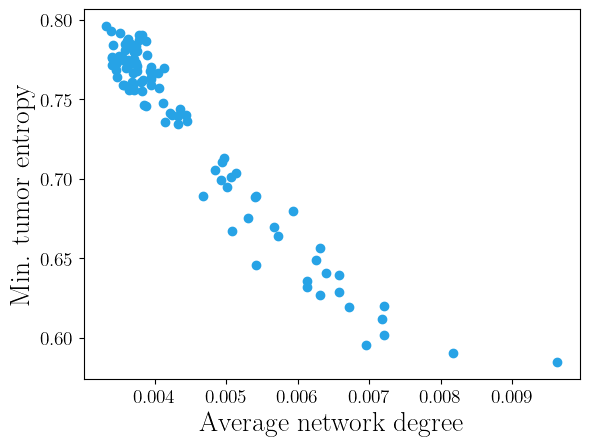

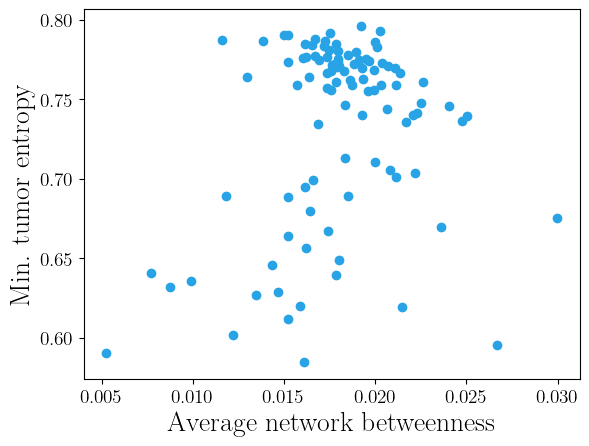

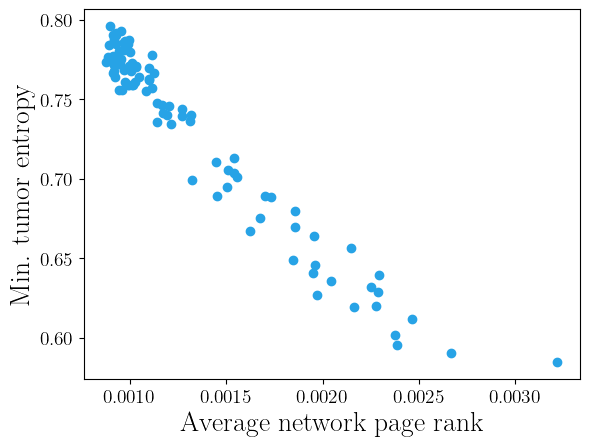

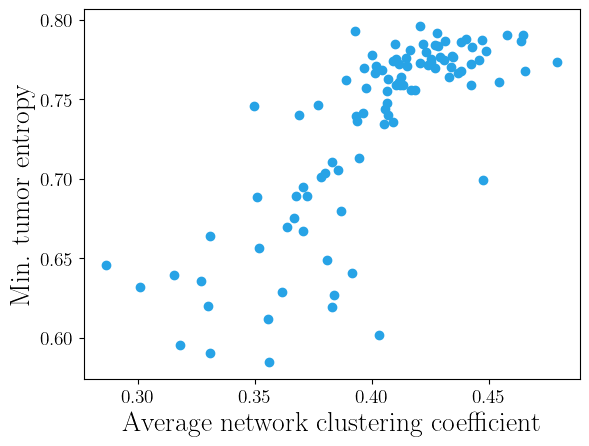

In [22]:
#exportTikzPath = "tikz_graphs"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('axes', labelsize=20) 
rc('xtick', labelsize=14)
rc('ytick',labelsize = 14)


#Average degree centrality - Min entropy
plt.figure()
plt.plot(averageDegrees, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network degree")
plt.ylabel("Min. tumor entropy")
plt.savefig('Figures/average_degrees_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)

#tikzplotlib.save(exportTikzPath + "/average_degrees_treatment.tex")

#Average in-betweenness - Min entropy
plt.figure()
plt.plot(averageBetweenness, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network betweenness")
plt.ylabel("Min. tumor entropy")
plt.savefig('Figures/average_betweenness_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_betweenness_treatment.tex")

#Average page rank - Min entropy
plt.figure()
plt.plot(averagePageRanks, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network page rank")
plt.ylabel("Min. tumor entropy")
plt.savefig('Figures/page_rank_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_page_rank_treatment.tex")

#Average clustering coefficient - Min entropy
plt.figure()
plt.plot(averageClusteringCoefficients, minEntropyValues, color = "#27a3e6", marker = "o", linestyle = "none")
plt.xlabel("Average network clustering coefficient")
plt.ylabel("Min. tumor entropy")
plt.savefig('Figures/clustering_coefficient_treatment.pdf',bbox_inches='tight', format='pdf', dpi=600)
#tikzplotlib.save(exportTikzPath + "/average_clustering_coefficient_treatment.tex")

### 3.- VDA treatment of specific nodes test

Here we target specific nodes of just one blood vessel network to examine how this impacts post-angiogenic tumor growth

Our files in network_metrics specify the indexes of the 100 nodes that present the maximum and min values for 

<ol>
<li>Degree centrality</li>
<li>in-betweenness</li>
<li>Page-rank</li>
<li>Clustering coefficient</li>
</ol>

What we do is eliminate blood vessels around 10 nodes presenting the maximum and minimum values for each metric, and then evolving the tumor to get the minimum entropy reached by the tumor. 

Smaller min entropy values will correspond to cases where the VDA therapy was more effective. 


In [5]:
#Network that we will treat
networkToTreat = 99
tumorPath = "bloodvessel_objects/" + "tumor_"+str(networkToTreat)+".pkl"
networkMetricsSrc = "network_metrics/"+"network_"+str(networkToTreat)+".csv"
minEntropyValues = []
nAttackedNodes = 10

automatonWidth = 150
automatonHeight = 150

entropyCalculator = ImageEntropyCalculator()

tumorEvolutionSteps = 300

tumor = Tissue(automatonWidth, automatonHeight)
tumor = tumor.importTumorInstance(tumorPath)

proliferatingPositions = tumor.getProliferatingLocations()
bloodVesselPositions = tumor.angiogenesisModule.occupiedCells
for i in range(0,8):
    
    #Open the tumor
    tumor = Tissue(automatonWidth, automatonHeight)
    tumor = tumor.importTumorInstance(tumorPath)

    #Turn it into a graph
    automatonTransformer = AutomatonToGraph()
    bloodVesselGraph = automatonTransformer.convertAutomatonToGraphWithTumor(bloodVesselPositions, proliferatingPositions)
    
    #Design the therapy using the nodes to target
    nodeNumbersToTarget = readCSVColumn(networkMetricsSrc, i)
    nodeNumbersToTarget = nodeNumbersToTarget[0:nAttackedNodes]
    
    locationsToTreat = np.zeros((automatonHeight, automatonWidth))
    for j in range(0,len(nodeNumbersToTarget)):
        nodeIndex = nodeNumbersToTarget[j]
        node = bloodVesselGraph.nodes[int(nodeIndex)]
        automatonIndex1 = node.automatonIndex1
        automatonIndex2 = node.automatonIndex2
        locationsToTreat[automatonIndex1, automatonIndex2] = 1
        
    
    startDay = 401
    vesselKillThreshold = 0.04
    potentialConstant = 1
    sourceAmplification = 2
    stepDeathProbability = 0.1
    
    angioTherapy = Therapy(TherapyType.VDA, startDay, locationsToTreat, vesselKillThreshold, potentialConstant, sourceAmplification, stepDeathProbability)
    
    tumor.addTherapy(angioTherapy)
    tumor.continueTumorEvolution(tumorEvolutionSteps, True, True, True, False)
    
    entropyTimeSeries = [entropyCalculator.computeImageEntropy(tumor.evolutionMovie[:,:,:,s]) for s in range(401, 401 + tumorEvolutionSteps)]
    minEntropyValue = np.min(entropyTimeSeries)
    minEntropyValues.append(minEntropyValue)
    
    clear_output(wait = True)



100%|█████████████████████████████████████████| 300/300 [03:38<00:00,  1.37it/s]


(0.2, 0.8)

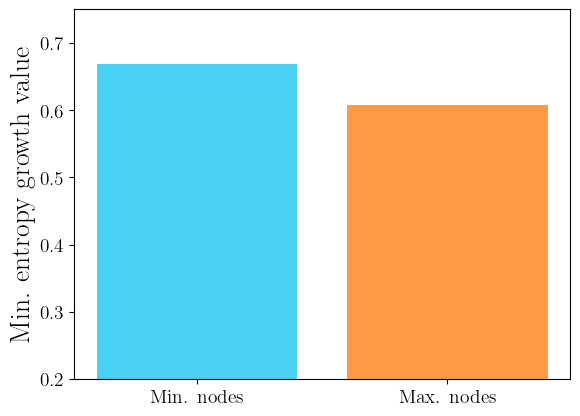

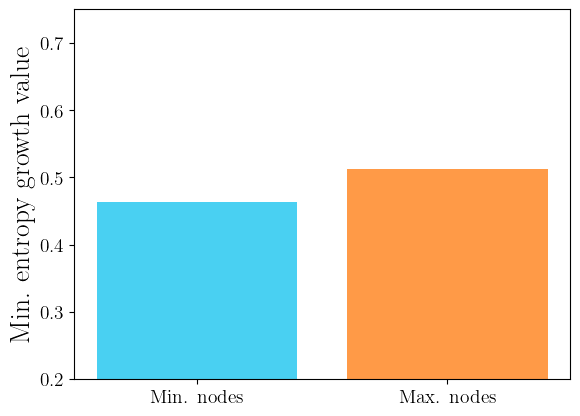

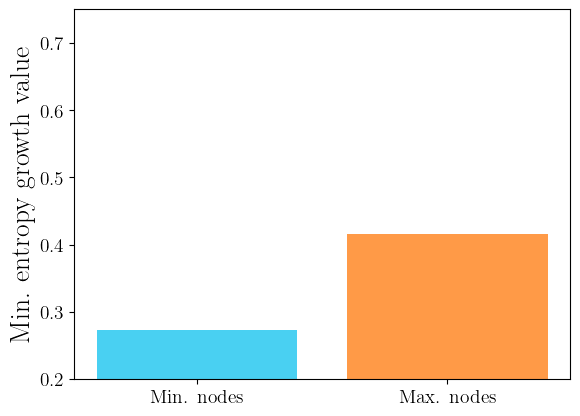

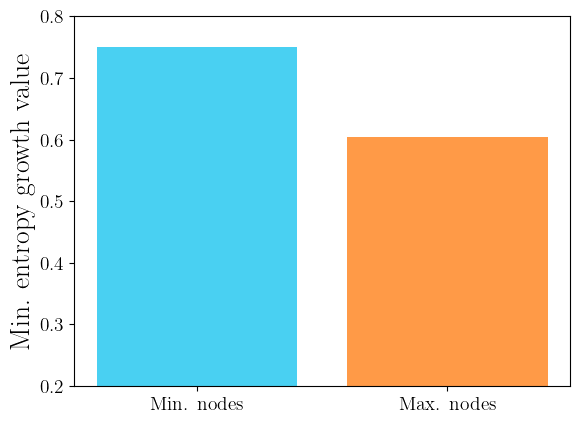

In [10]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('axes', labelsize=20) 
rc('xtick', labelsize=14)
rc('ytick',labelsize = 14)


minNodesColor = "#49d0f2"
maxNodesColor = "#ff9a47"
exportTikzPath = "tikz_graphs"

colors = [minNodesColor, maxNodesColor]

#Average degree
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [minEntropyValues[0], minEntropyValues[4]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.savefig('Figures/vda_therapy_avg_degree.pdf',bbox_inches='tight', format='pdf', dpi=600)
plt.ylim([0.2, 0.75])
#tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_degree.tikz")


#Average betweenness
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [minEntropyValues[1], minEntropyValues[5]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.savefig('Figures/vda_therapy_avg_betweenness.pdf',bbox_inches='tight', format='pdf', dpi=600)
plt.ylim([0.2, 0.75])
#tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_betweenness.tikz")


#Average page rank
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [minEntropyValues[2], minEntropyValues[6]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.savefig('Figures/vda_therapy_avg_page_rank.pdf',bbox_inches='tight', format='pdf', dpi=600)
plt.ylim([0.2, 0.75])
#tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_page_rank.tikz")


#Average clustering
plt.figure()
plt.bar(["Min. nodes", "Max. nodes"], [minEntropyValues[3], minEntropyValues[7]], color = colors)
plt.ylabel("Min. entropy growth value")
plt.savefig('Figures/vda_therapy_clustering_coeff.pdf',bbox_inches='tight', format='pdf', dpi=600)
plt.ylim([0.2, 0.8])
#tikzplotlib.save(exportTikzPath + "/angiogenesis_therapy_avg_clustering_coeff.tikz")